<a href="https://colab.research.google.com/github/jmlucasusc4/World_Happiness_Project/blob/main/World_Happiness_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv('/content/2019.csv')
dataset.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
dataset.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [4]:
dataset.shape

(156, 9)

In [5]:
### CHECK FOR MISSING VALUES

In [6]:
Missing_values= dataset.isna().sum()
Missing_values

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [7]:
dataset.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [9]:
dataset_cor=dataset.corr()
dataset_cor

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


###HEATMAP CORRELATION

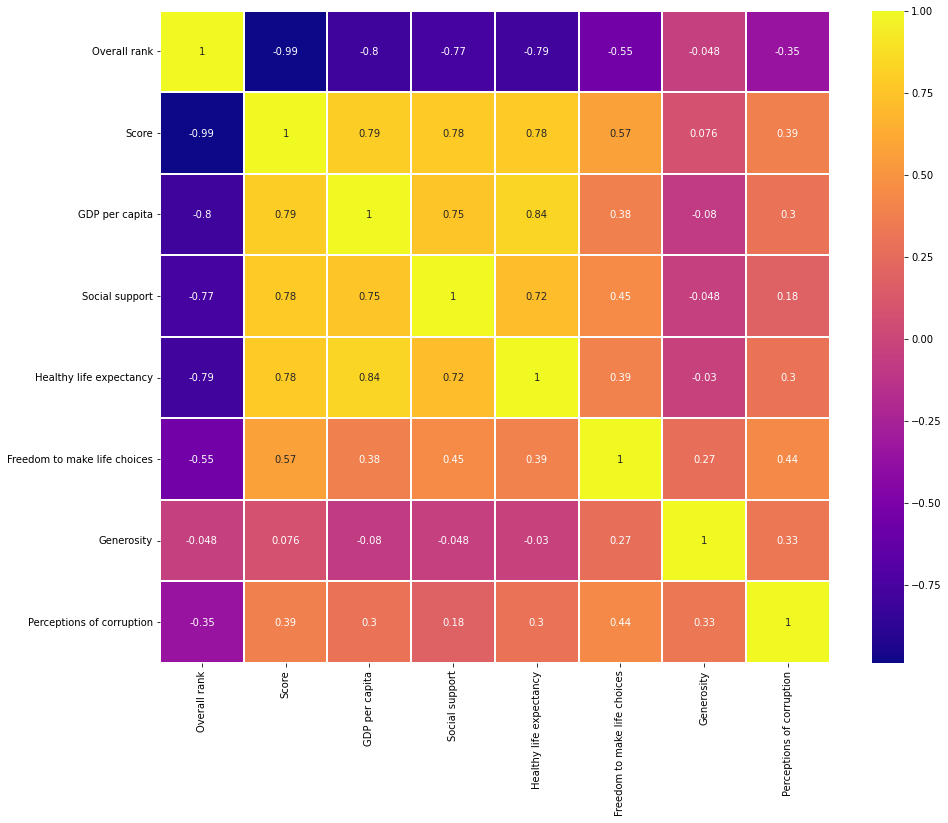

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(dataset_cor,annot=True,linewidths=1.0,cmap=('plasma'))
plt.show()

### EXPLORATORY DATA ANALYSIS

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


count    156.000000
mean       0.905147
std        0.398389
min        0.000000
25%        0.602750
50%        0.960000
75%        1.232500
max        1.684000
Name: GDP per capita, dtype: float64


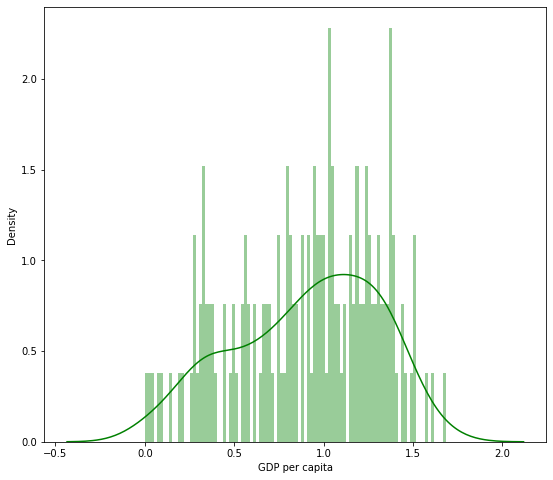

In [33]:
print(dataset['GDP per capita'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset['GDP per capita'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [25]:
list(set(dataset.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [26]:
dataset_num = dataset.select_dtypes(include = ['float64', 'int64'])
dataset_num.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [27]:
dataset_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.9 KB


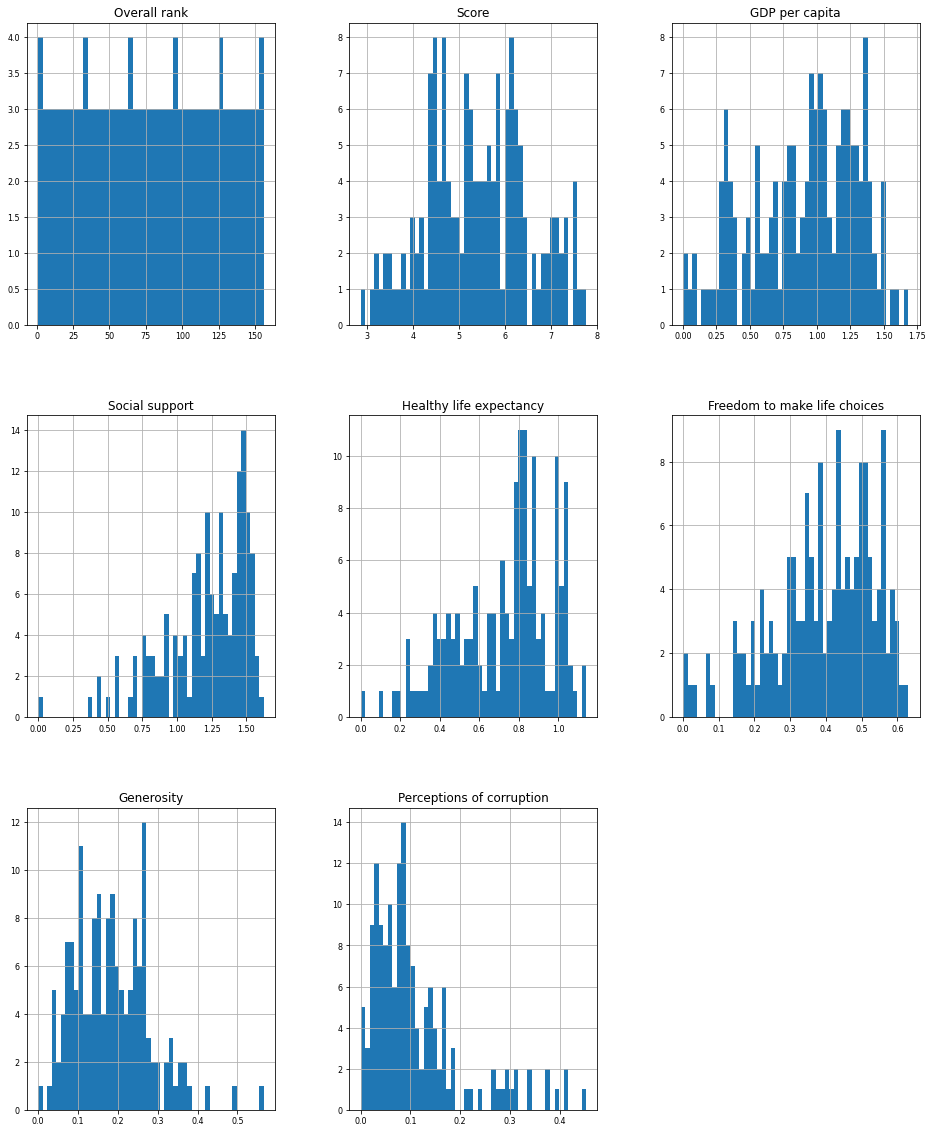

In [28]:
dataset_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib

In [34]:
dataset_num_corr = dataset_num.corr()['GDP per capita'][:-1] # -1 because the latest row is GDP per capita  
golden_features_list = dataset_num_corr[abs(dataset_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Perceptions of corruption :\n{}".format(len(golden_features_list), golden_features_list))

There is 5 strongly correlated values with Perceptions of corruption :
GDP per capita             1.000000
Healthy life expectancy    0.835462
Score                      0.793883
Social support             0.754906
Overall rank              -0.801947
Name: GDP per capita, dtype: float64


###Prepare data for Linear Regression Modeling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [36]:
dataset.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [44]:
x= dataset.drop(['Overall rank','Country or region','Score','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'],axis=1)
y=dataset.iloc[:,3]

In [45]:
y.head()

0    1.340
1    1.383
2    1.488
3    1.380
4    1.396
Name: GDP per capita, dtype: float64

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [47]:
linear_regression_model=linear_model.LinearRegression()
model=linear_regression_model.fit(x_train,y_train)

In [48]:
pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

In [49]:
train_set_r2 = r2_score(y_train, pred_train)
print('Linear model, R2 train score is : {}'.format(train_set_r2))
test_set_r2 = r2_score(y_test, pred_test)
print('Linear model, R2 test score is : {}'.format(test_set_r2))

Linear model, R2 train score is : 1.0
Linear model, R2 test score is : 1.0


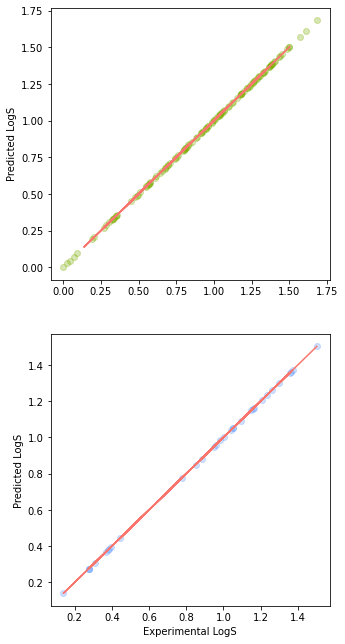

In [50]:
# Scatter plot of experimental vs. predicted Logs
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,11))
plt.subplot(2,1,1)
plt.scatter(x=y_train,y=pred_train, c='#7CAE00',alpha=0.3)
z=np.polyfit(y_train,pred_train,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),'#F8766D')
plt.ylabel('Predicted Logs')

z = np.polyfit(y_train, pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted LogS')

plt.subplot(2, 1, 2)
plt.scatter(x=y_test, y=pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(y_test, pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.show()

###PCA

In [53]:
###PCA

dataset_numerical_features = [col for col in dataset.columns if dataset[col].dtype == 'float64'] 

dataset_numerical_features


['Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [54]:
# check after removing the column label
dataset_numerical_features

['Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [55]:
# extract the numerical only dataset
numerical_features_datset = dataset[dataset_numerical_features]

In [56]:
numerical_features_datset.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [57]:
for col in dataset_numerical_features:
    numerical_features_datset[col] = numerical_features_datset[col].fillna(numerical_features_datset[col].median())

In [58]:
numerical_features_datset.isnull().sum()

Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [59]:
###Scaling Data

In [60]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(numerical_features_datset)

MinMaxScaler()

In [61]:
# get scaled data 
dataset_scaled = pd.DataFrame(min_max_scaler.transform(numerical_features_datset))

# assign column labels
dataset_scaled.columns = dataset_numerical_features

In [62]:
dataset_scaled.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.519548,0.537498,0.744344,0.635621,0.622140,0.326583,0.244156
std,0.226428,0.236573,0.184231,0.212203,0.227083,0.168294,0.208693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.344081,0.357928,0.650092,0.480061,0.488114,0.192138,0.103753
50%,0.513934,0.570071,0.782943,0.691499,0.660856,0.313604,0.188742
75%,0.677685,0.731888,0.894397,0.772787,0.803883,0.438604,0.311810
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# import PCA from decomposition
from sklearn.decomposition import PCA

# create the PCA object to use to fit the given data
pca = PCA()

# fit the PCA with the given cleaned-up data
pca.fit(dataset_scaled)

PCA()

In [64]:
# Principal axes in feature space, representing the directions of maximum variance in the data.
print(pca.components_)

[[-0.49682982 -0.49910073 -0.36259925 -0.43938029 -0.34965769 -0.03404146
  -0.23686707]
 [-0.03780737 -0.29100336 -0.19243356 -0.2233534   0.51297032  0.48330586
   0.57467132]
 [-0.06138101  0.20293791 -0.17869453  0.16050825 -0.67347284  0.04491931
   0.66465821]
 [ 0.09479099  0.03656071  0.10019208  0.12744194 -0.29134128  0.86542528
  -0.35994085]
 [-0.4449003   0.27732028 -0.58375547  0.53897491  0.26178353  0.05054494
  -0.15102109]
 [-0.56267425  0.59484015  0.35025743 -0.43081171  0.08715603  0.10771985
   0.0456525 ]
 [ 0.47375012  0.43926494 -0.57102557 -0.48883656 -0.0053619   0.0109362
  -0.13201287]]


In [65]:
print(pca.mean_)

[0.51954763 0.53749848 0.74434366 0.63562103 0.62214027 0.32658331
 0.24415577]


In [66]:
print(pca.noise_variance_)

0.0


In [67]:
principal_components = pca.fit_transform(dataset_scaled)

print(type(principal_components))
print(principal_components.shape)

principal_components_df = pd.DataFrame(principal_components)


<class 'numpy.ndarray'>
(156, 7)


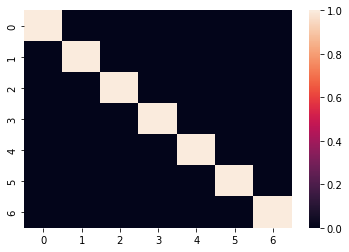

In [68]:
import seaborn as sns

sns.heatmap(principal_components_df.corr())

In [69]:
###Choosing the Number of Principal Components

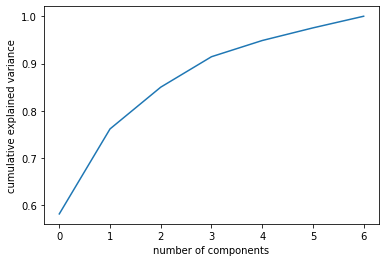

In [70]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [71]:
###PCA for Dimensionality Reduction"

In [72]:
 pca_low_dim = PCA(n_components = 3)

In [73]:
pca_low_dim.fit(dataset_scaled)

PCA(n_components=3)

In [74]:
# original components
print(dataset_scaled.shape)

# transformed components
print(pca_low_dim.transform(dataset_scaled).shape)

(156, 7)
(156, 3)


In [75]:
print(pca_low_dim.explained_variance_)

[0.18018039 0.05566573 0.02735578]


In [76]:
print(pca_low_dim.explained_variance_.sum())

0.26320190966595314
